In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Objective:
Group patients into clusters of **Hight risk of Heart attack, Medium risk and Low risk** based on similarities in their health attributes (like blood pressure, cholesterol, age, etc.) without using any labels (i.e., unsupervised learning).

# Getting Familiar with the data:

In [2]:
df = pd.read_csv("heart_disease.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 107.9+ KB


In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000
mean,459.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653
min,0.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,229.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000
50%,459.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000
75%,689.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000
max,919.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000


# Preprocessing The Data:

In [5]:
df.drop(columns=['id'], inplace=True)

In [6]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df['chol'] = df['chol'].fillna(df['chol'].median())
df['thalch'] = df['thalch'].fillna(df['thalch'].median())
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())
df['ca'] = df['ca'].fillna(df['ca'].median())

In [7]:
for col in ['fbs', 'restecg', 'exang', 'slope', 'thal']:
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\HASHIR\AppData\Local\Temp\ipykernel_21632\61125900.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  920 non-null    float64
 5   chol      920 non-null    float64
 6   fbs       920 non-null    bool   
 7   restecg   920 non-null    object 
 8   thalch    920 non-null    float64
 9   exang     920 non-null    bool   
 10  oldpeak   920 non-null    float64
 11  slope     920 non-null    object 
 12  ca        920 non-null    float64
 13  thal      920 non-null    object 
dtypes: bool(2), float64(5), int64(1), object(6)
memory usage: 88.2+ KB


# Exploratory Data Analysis:

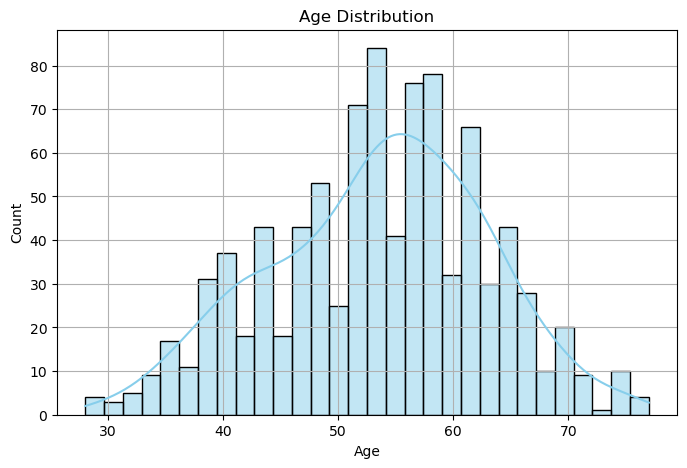

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The age column forms a kind of **Gaussian Distribution** with a lot of records in between 50 and 60. It also has a significant records in between 40-50.

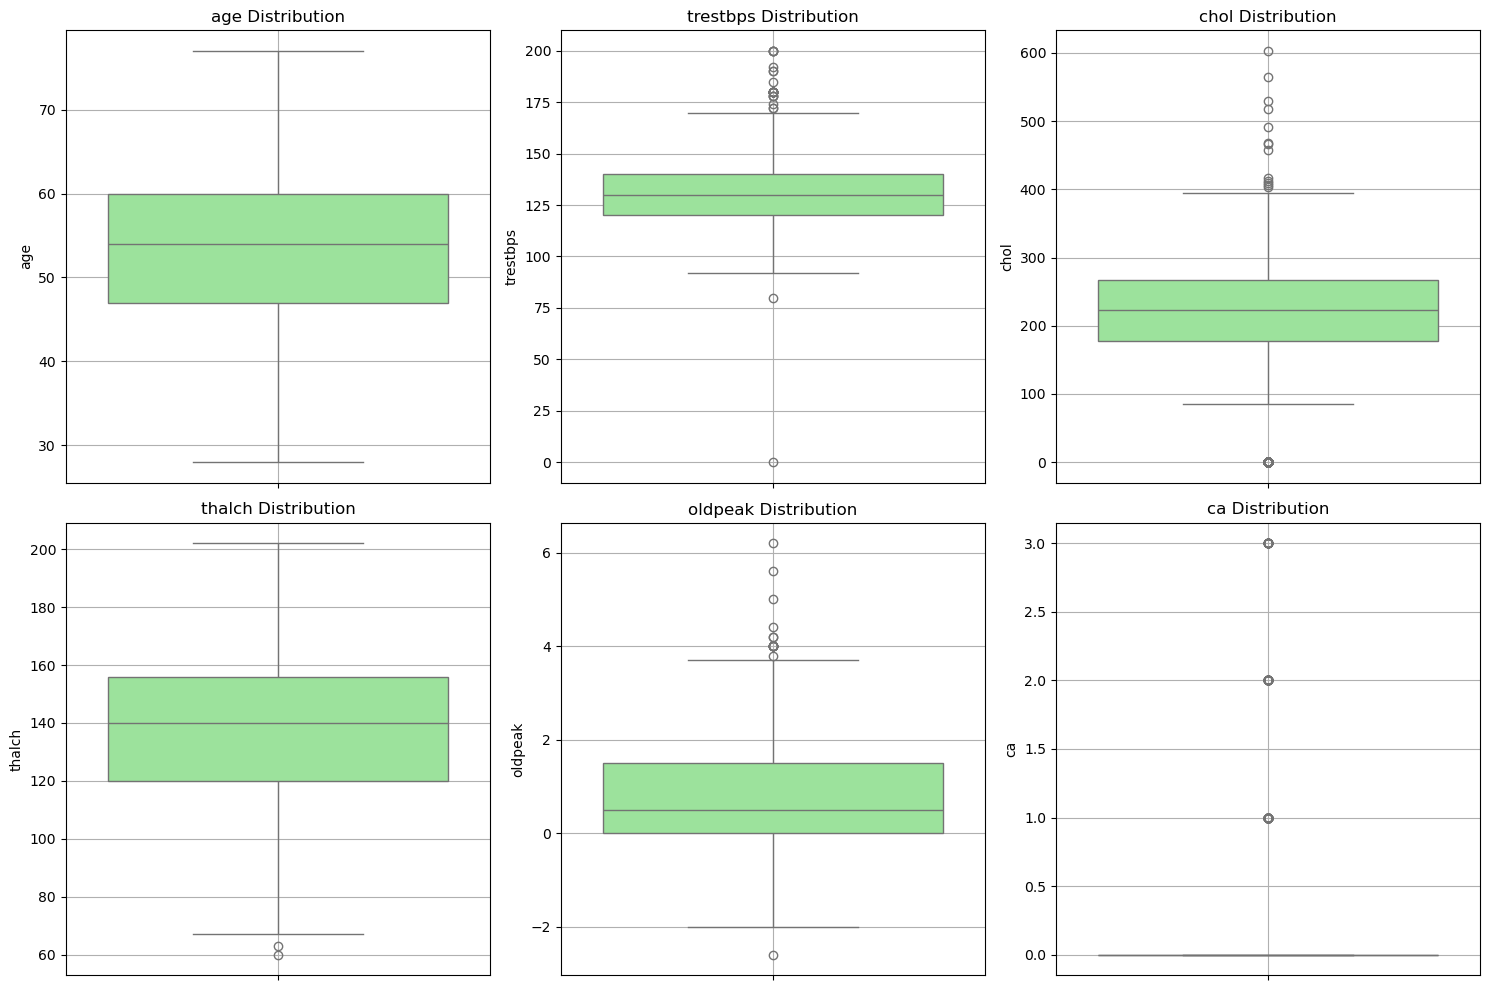

In [10]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'{col} Distribution')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot analysis:
1. **age Distribution** has majority of records in between **47-60**.
2. **testbps** has majority of records in between **120-140** with some outliers till 200.
3. **chol Distribution** has majority of records in between **180-270** with some outliers from 400-600.
4. **talch Distribution** has majority of records in between **120-155**.
5. **oldpeak Distribution** has majority of records in between **0-1.5** with some outliers till 6.
6. **ca Distribution** is almost 50% **0** and equally distributed for 3 outliers of 1 2 and 3.

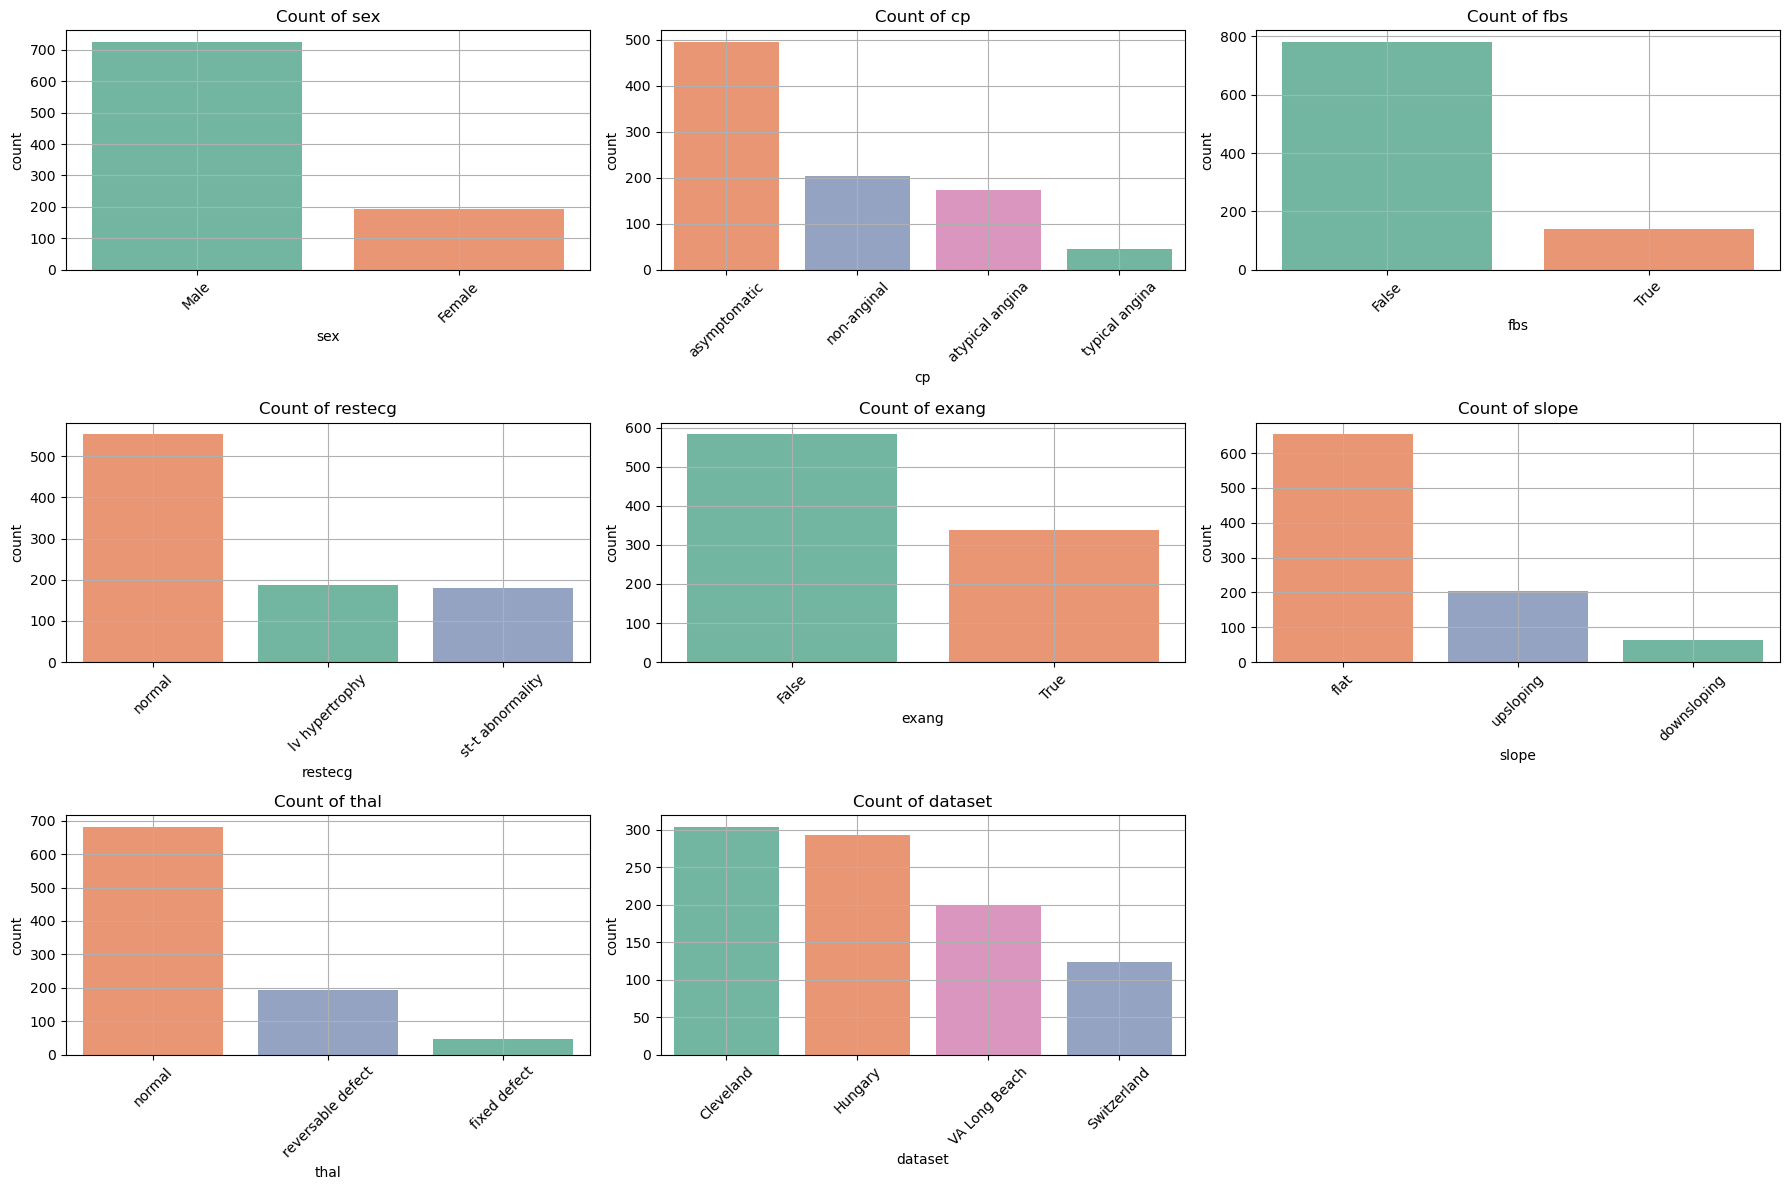

In [12]:
plt.figure(figsize=(18,12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, hue=col, palette='Set2', legend=False,
                  order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()

# Categorical columns analysis:
1. The Sex columns as almost **75%** *males* and **25%** *females*.
2. Cp column contains **60%** *asymptomatic*, **22%** *non anginal*, **20%** *atypical angina* and **7-8%** *typical angina records*.
3. fbs is **False** for **85%** of the records.
4. restecg contains **60%** *normal*, **20%** *Iv hypertrophy* and **20%** *st-t abnormality*.
5. exang is **False** for **65%** of the records.
6. slope is *flat* for **70%** of the records, *Upsloping* for **25%** and *downsloping* for the remaining **5%**
7. thal is *normal* for almost **73%** of the records, *reversable* defect for **23%** and *fixed defect* for remaining **4%**.
8. dataset columns contains **32%** records from *Cleaveland*, **32%** from *Hungary*, **21%** from *VA Long Beach* and the remaining from *Switzerland*.

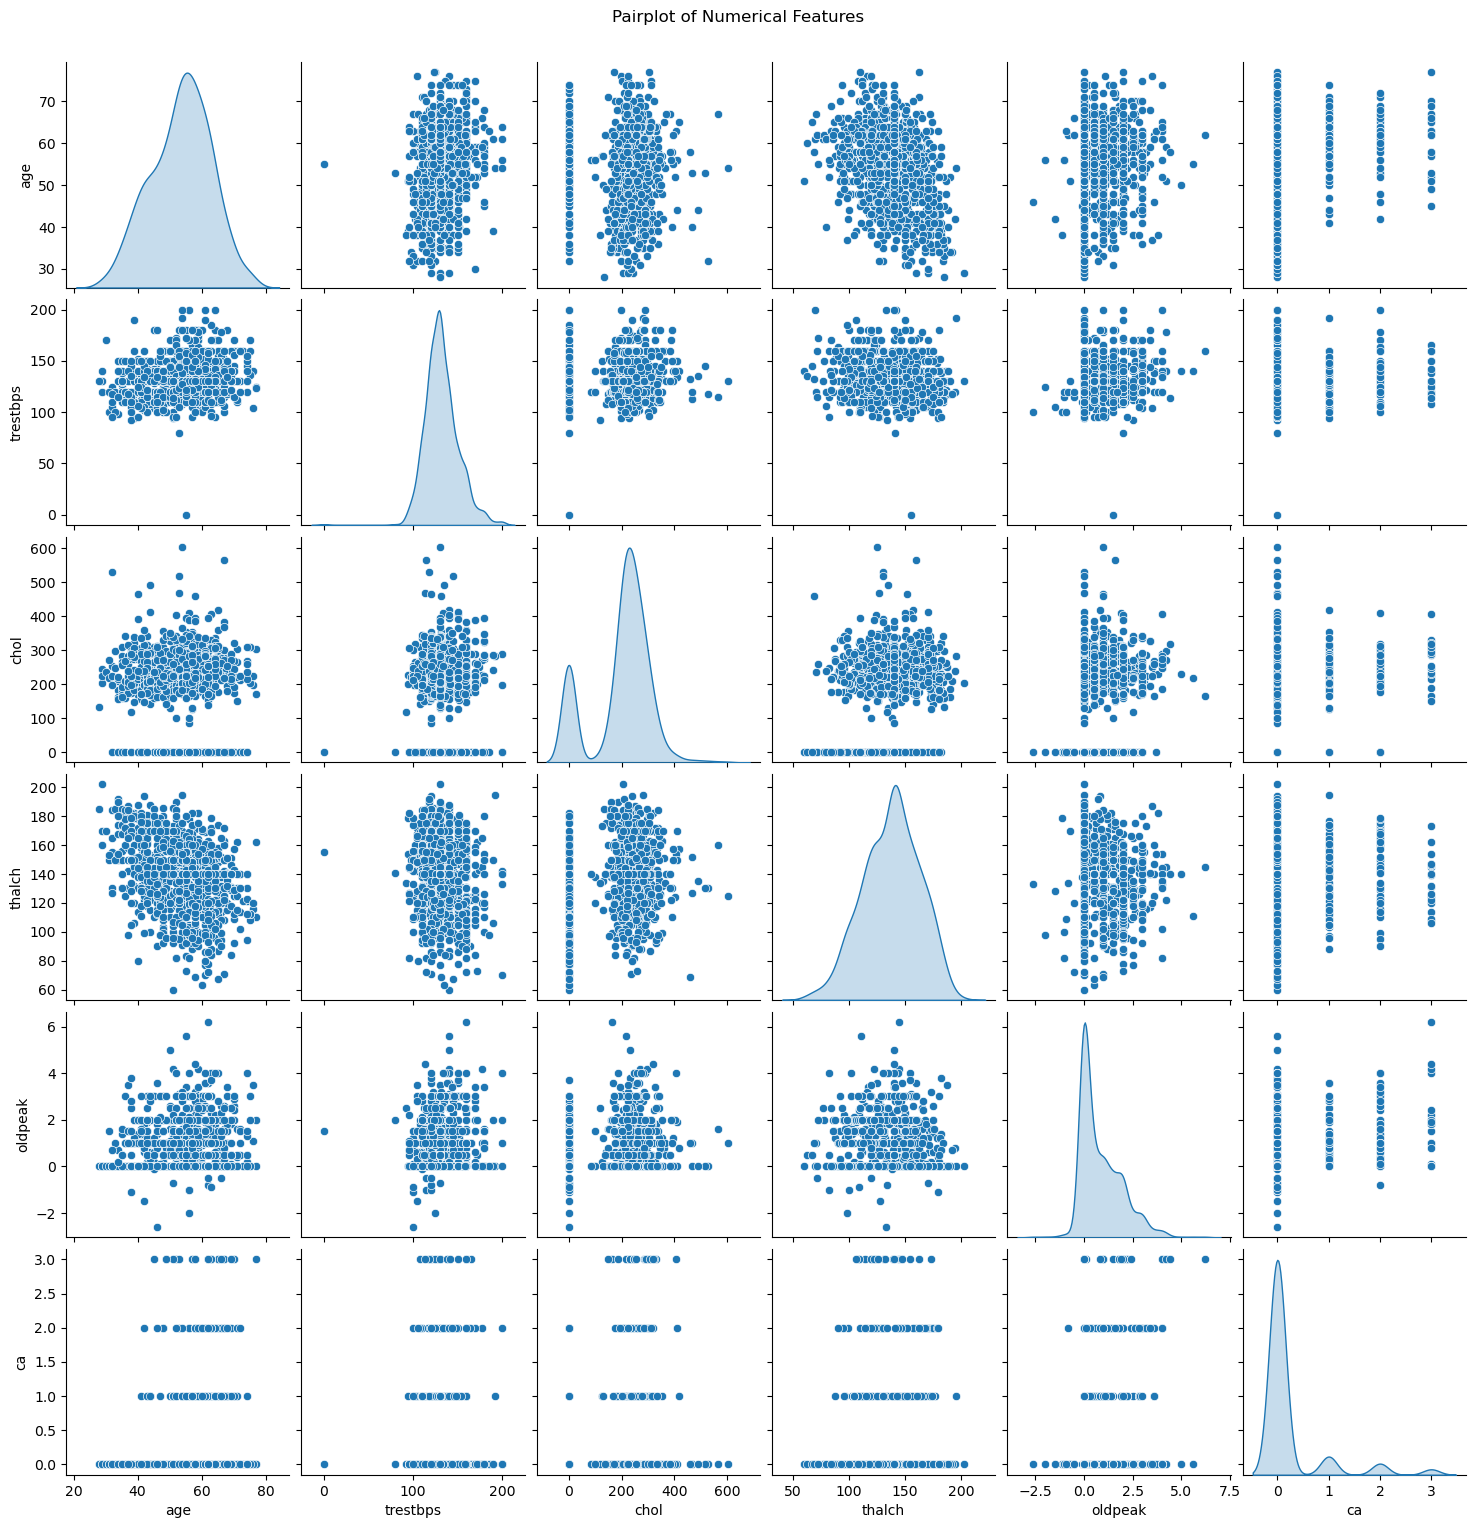

In [13]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

1. **Age** is almost equally dirtributed for all the records.
2. **testbps** is between **100-200** for all the records.